$\def\P{\mathbb{P}}$

# Bayesian philosophy

## Having a disease given a positive test

Let's start with, perhaps, the most common example to introducce the Bayes rule.

There is a laboratory test that detects a disease A. Denote by $T=1$ the event of a positive test and $T=0$ the event of a negative test. Meanwhile, $E=1$ denotes that the patient has the disease and $E=0$ denotes that the patient does not have the disease.

The test has the following characteristics:

$$\P(T=1|E=1)=0.92,\quad \P(T=0|E=0)=0.99,$$

while the prevalence of the disease (the proportion of people with the disease) is 0.12, that is

$$\mathbb{P}(E=1)=0.12.$$

I take the test (assuming that I belong to the referred population) and it is positive, what is the probability that I have the disease A?

Note that $\P(T=1|E=1)$ or $\P(T=1|E=0)$ are **not** the quantities we need. Instead, we want to know what happens given that $T=1$

Bayes' rules give us the answer:

$$\P(E=1|T=1) = \frac{\P(T=1|E=1)\P(E=1)}{\P(T=1|E=1)\P(E=1)+\P(T=1|E=0)\P(E=0)}.$$

The next cell makes the calculation for us:

In [1]:
PT1GivenE1, PT0GivenE0 = 0.92, 0.99
PT1GivenE0 = 1 - PT0GivenE0

PE1 = 0.12
PE0 = 1 - PE1

PE1GivenT1 = PT1GivenE1 * PE1 / (PT1GivenE1 * PE1 + PT1GivenE0 * PE0)

round(PE1GivenT1,4)

0.9262

But, in reality, I have or I do not have the disease; then...

What's the meaning of "the probability of having the disease is 0.9262"!?

There are not frequencies of repeated events: I am or I am not sick!

The Bayesian statistician Bruno de Finetti began his 1973 book on probability theory with the declaration: "PROBABILITY DOES NOT EXIST." The capitals appeared in the original. What did he mean?

## The probability is conditional and subjective

One of the fundamental points of Bayesian statistics is the concept of probability (and its definition). Let's start with some example in which we use the concept of probability and let's try to find a definition for it.

1. What is the probability that in a coin flipping that we get "head"?
2. What is the probability that there would be an eclipse tomorrow?
3. What is the probability of raining tomorrow?
4. What is the probability that it is raining in Mexico?
5. What is the probability that there are more than $10^9$ stars in our galaxy?

One might think that the answer to the first quention is 0.5 but, what coin are we talking about? does the coin has a "head"? it could be a foreign coin without "head". The coin that we are using, was given to us as change at the store? or is a coin that an illusionist just took out of their pocket?

For the fourth question, I could search if it is raining in Mexico (the city? the state? the whole country or just some part?) and then the probability would be 0 or 1; but right now, how much do we know about the event "it's raining in Mexico"?

Let be $A$ the event "it's raining in Mexico". A person that lives some km away from Qaanaaq, without internet, wouldn't have any reason to asign a larger propability to $A$ than $A^c$. If we denote by $\mathcal{H}_1$ the information of this person, then

$$\P(A|\mathcal{H}_1)=\P(A^c|\mathcal{H}_1).$$

Meanwhile, a person that lives in El Bajío has a different information $\mathcal{H}_2$, and could assign the following measure of probability

$$\P(A|\mathcal{H}_2)=\begin{cases}
3/4 & \text{if it's raining in El Bajío}, \\ 
1/4 & \text{otherwise}.
\end{cases}
$$

On the other hand, someone that lives in Mexico has an information $\mathcal{H}_3$, such that

$$\P(A|\mathcal{H}_3)=\begin{cases}
1 & \text{if it's raining in Mexico}, \\ 
0 & \text{otherwise}.
\end{cases}
$$

Thus, **the probability of an event $A$ is the measurement of the uncertainty that some agent has on that event**. This means that the probability is always contextual, given some assumptions and considerations, even for the simplest cases.

## Marbles in a bag

:::{note}
This example was taken from {cite}`mcelreath2018statistical`
:::

Assume that a bag has 4 marbles, which could be white or black, but we don't know how many are of each color. Thus, there are five posibilities: $\{W,W,W,W\}$, $\{B,W,W,W\}$, $\{B,B,W,W\}$, $\{B,B,B,W\}$, $\{W,W,W,W\}$. Let's called these posibilities *conjectures*. We want to know which posibility is more likely given some evidence about the content in the bag.

Because at the beginning we have no information about the plausibility of each conjecture, we assign a probability of 1/5 to each one. Then, we extract 3 marbles at random, one at a time, with replacement and observed $(B,W,B)$.

We can calculate the probability of the event $(B,W,B)$ for each one of the conjectures.

|   Comjecture  | Prior Probability | Posterior Probability |
|---------------|-------------------|-----------------------|
| $\{W,W,W,W\}$ |        1/5        | $\propto 1/5\times 0$ |
| $\{B,W,W,W\}$ |        1/5        | $\propto 1/5\times 3$ |
| $\{B,B,W,W\}$ |        1/5        | $\propto 1/5\times 8$ |
| $\{B,B,B,W\}$ |        1/5        | $\propto 1/5\times 9$ |
| $\{B,B,B,B\}$ |        1/5        | $\propto 1/5\times 0$ |

Thus, the conjecture $\{B,B,B,N\}$ is the most plausible.

In [2]:
import numpy as np

from scipy.stats import beta, binom
from scipy.special import logit, expit

import matplotlib.pyplot as plt
import seaborn as sns

---

## Female proportion of birth

Laplace estimated the proportion of girl births. A total of 241,945 girls and 251,527 boys were born in Paris from 1745 to 1770. In analyzing the binomial model, Laplace used the uniform prior distribution. Let be $\theta$ the **probability of a female birth** and $Y|\theta$ the observed female births. The model is then
$$\theta\sim \textsf{Uniform}(0,1)$$
and
$$Y|\theta\sim\textsf{Binomial}(n,\theta),$$
where $n$ is the total number of births. Thus
$$\theta|Y\sim\textsf{Beta}(Y+1, n-Y+1)$$

In [3]:
fem_births = 241945
mal_births = 251527

In [4]:
beta.sf(0.5, fem_births+1, mal_births+1)

1.1460584901546728e-42

---

## Probability of a girl birth given placenta previa

Placenta previa is an unusual condition of pregnancy in which the placenta is implanted low in the uterus. An early study concerning the sex of placenta previa births in Germany found of a total of 980 births, 437 were female.

In [5]:
births = 987
fem_births = 437

Posterior mean

In [6]:
beta.mean(fem_births+1, births-fem_births+1).round(3)

0.443

Posterior interval

In [7]:
LowInterval = beta.mean(fem_births+1, births-fem_births+1) - 2 * beta.std(fem_births+1, births-fem_births+1)
UppInterval = beta.mean(fem_births+1, births-fem_births+1) + 2 * beta.std(fem_births+1, births-fem_births+1)

round(LowInterval,3), round(UppInterval,3)

(0.411, 0.474)

We can also simulate a sample from the posterior to make inferences

In [8]:
PosteriorSample = beta.rvs(size=1000, a=fem_births+1, b=births-fem_births+1)

<Axes: ylabel='Density'>

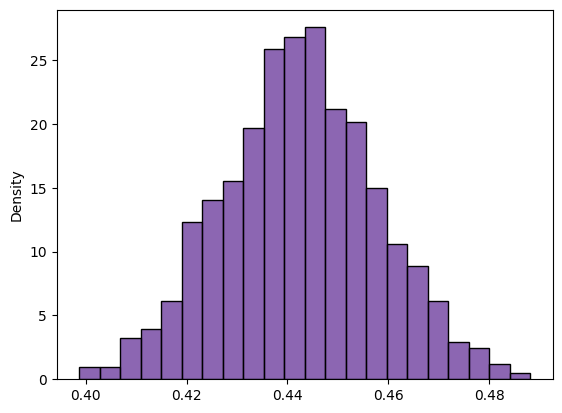

In [9]:
sns.histplot(PosteriorSample, color='rebeccapurple', stat='density')

In [10]:
np.quantile(PosteriorSample, [0.025, 0.975]).round(3)

array([0.413, 0.473])

The normal approximation is generally improved by applying it the logit transform, $\log (\frac{\theta}{1-\theta})$, which transforms the parameter space from the unit interval to the real line.

In [11]:
LogitPosteriorSample = logit(PosteriorSample)

<Axes: ylabel='Density'>

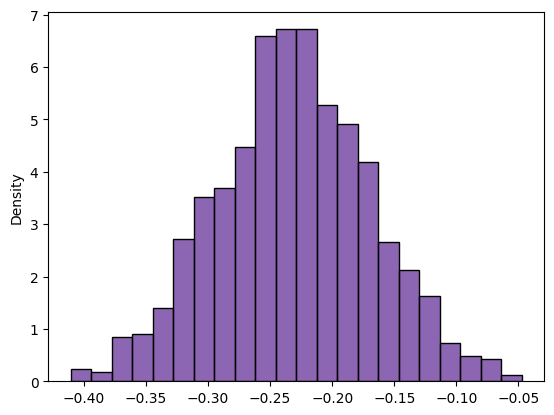

In [12]:
sns.histplot(LogitPosteriorSample, color='rebeccapurple', stat='density')

In [13]:
LowLogitInterval = LogitPosteriorSample.mean() - 2 * LogitPosteriorSample.std()
UppLogitInterval = LogitPosteriorSample.mean() + 2 * LogitPosteriorSample.std()

expit(LowLogitInterval).round(3), expit(UppLogitInterval).round(3)

(0.412, 0.473)

---

## Population of cells in production of a protein

A particular population of cells might be in one of the next three states of production of a protein. The states are A, B, and C, of low, medium and high production, respectively. We take a random sample of 20 cells, and we verify if each one of the cells is in production of the protein, the result of the test is yes or no (1 or 0) for each analyzed cell. From this test we detect that 12 cells are in production (1) and the rest are not (0). On the other hand, if the population is in state A, we expect that 20% of the cells produces the protein, 50% for the state B, and 70% for the state C.

What is the probability that the population is in each one of these states?

In [14]:
theta_A = 0.2
theta_B = 0.5
theta_C = 0.7

In [15]:
print(theta_A**12 * (1-theta_A)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8))
print(theta_B**12 * (1-theta_B)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8))
print(theta_C**12 * (1-theta_C)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8))

0.0003689659385173454
0.5120431003054828
0.4875879337559998


In [16]:
p_A = binom.pmf(12, 20, theta_A)
p_B = binom.pmf(12, 20, theta_B)
p_C = binom.pmf(12, 20, theta_C)

In [17]:
print(p_A/(p_A+p_B+p_C))
print(p_B/(p_A+p_B+p_C))
print(p_C/(p_A+p_B+p_C))

0.00036896593851734545
0.5120431003054832
0.4875879337559995
